# "Hacia un Futuro sin Diabetes: Analizando el Camino hacia la Prevención
En un mundo donde la diabetes se ha convertido en una pandemia silenciosa, afectando millones de vidas en todo el globo, nos encontramos ante un desafío urgente y apremiante: entender y abordar esta problemática de salud pública. La diabetes, una enfermedad crónica que afecta la forma en que el cuerpo utiliza la glucosa en sangre, se ha transformado en una de las principales causas de enfermedad y mortalidad a nivel mundial.

Introducción:
Imagine un futuro en el que la diabetes ya no sea una amenaza abrumadora. Un futuro en el que seamos capaces de prevenirla y tratarla eficazmente, mejorando la calidad de vida de millones de personas y reduciendo el impacto económico y social asociado con esta enfermedad. Para lograr este cambio, es crucial comprender en profundidad los factores que contribuyen al desarrollo de la diabetes y cómo estos interactúan en un nivel individual y poblacional.

En este proyecto de ciencia de datos, nos proponemos explorar y analizar nuestros datos sobre la diabetes para identificar patrones, relaciones y factores de riesgo. Utilizaremos conjuntos de datos que contienen información demográfica, historial médico, y hábitos de estilo de vida, para construir un modelo predictivo. Este modelo buscará prever la probabilidad de que una persona desarrolle diabetes en función de diversas variables.

## Definición de objetivo: ¿Cómo podemos obtener insight respecto a los patrones, relaciones, y factores de riesgo encontrados en poblaciones con diabetes?

In [177]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format




## Introducción





**Contexto comercial.** En un entorno en constante evolución, donde la atención médica y la investigación científica convergen, existe una necesidad apremiante de avanzar en la comprensión de las enfermedades crónicas, como la diabetes. Los avances tecnológicos y las demandas de la sociedad han impulsado a los laboratorios biomédicos a buscar nuevos enfoques que no solo mejoren la calidad de los servicios médicos, sino que también aumenten su rentabilidad. En este escenario, se presenta un laboratorio hipotético de biología que ve en la mejora de sus capacidades predictivas una oportunidad para impulsar sus resultados financieros.

---

**Problema comercial.** En este contexto, el laboratorio se enfrenta a un desafío crucial: cómo desarrollar un modelo analítico que no solo permita entender mejor la relación entre la diabetes y sus factores contribuyentes, sino que también sea capaz de prever con alta precisión la presencia de la enfermedad en diferentes individuos. La correlación entre elementos como los niveles de HbA1c, los niveles de glucosa en sangre y el historial de tabaquismo es compleja y multidimensional. Sin embargo, una solución efectiva a este problema no solo mejoraría la calidad de los servicios de diagnóstico y tratamiento ofrecidos por el laboratorio, sino que también elevaría su posición competitiva y su capacidad para atraer a pacientes y médicos.

---

**Contexto analítico.** En el núcleo de este desafío se encuentra un conjunto de datos que comprende información demográfica, historial médico y variables clave relacionadas con la diabetes y sus factores contribuyentes. Este conjunto de datos actúa como la piedra angular de la estrategia analítica del laboratorio. Mediante un enfoque riguroso de análisis estadístico, que incluye estadísticas descriptivas, análisis de correlación y regresión logística, se pretende explorar la asociación entre las variables seleccionadas y la presencia de diabetes. La precisión de las predicciones resultantes de este análisis se convierte en el motor que impulsa la rentabilidad del laboratorio, al permitir intervenciones más efectivas, personalización de tratamientos y la identificación de poblaciones de alto riesgo.

En última instancia, la confluencia del contexto comercial y la necesidad de abordar el problema comercial impulsan al laboratorio a adentrarse en un enfoque analítico que no solo amplíe el conocimiento en el campo de la diabetes, sino que también genere beneficios tangibles y sostenibles. Este proceso no solo fortalecerá la reputación del laboratorio como líder en investigación de vanguardia, sino que también contribuirá a mejorar la salud y el bienestar de las personas, al proporcionar herramientas más precisas y efectivas en la prevención y el manejo de la diabetes.

La base de datos utilizada puede encontrarse en el siguiente link de Kaggle: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data




## Abstract

Este estudio tiene como objetivo explorar la relación entre la diabetes y sus principales factores contribuyentes, que incluyen los niveles de HbA1c, los niveles de glucosa en sangre y el historial de tabaquismo. El conjunto de datos utilizado para el análisis comprende el estado de diabetes de las personas (diabéticas o no diabéticas), los niveles de HbA1c, los niveles de glucosa en sangre y el historial de tabaquismo categorizado en variables de "nunca", "anteriormente", "actualmente", "no actualmente" y "siempre".

Los objetivos de la investigación son investigar la asociación entre la diabetes y las variables seleccionadas. La hipótesis es que los niveles más altos de HbA1c, tabaquismo, y los niveles altos de glucosa en sangre estarán positivamente correlacionados con la presencia de diabetes.

Para abordar esta interrogante de investigación e hipótesis, el conjunto de datos se someterá a un riguroso análisis estadístico. Se utilizarán estadísticas descriptivas para caracterizar el perfil demográfico de la población de estudio. Los análisis de correlación evaluarán las relaciones entre las variables de interés. Se empleará una regresión logística para determinar los efectos independientes de los niveles de HbA1c, los niveles de glucosa en sangre y el historial de tabaquismo en la presencia de diabetes, controlando posibles variables de confusión.

Los hallazgos de este estudio tienen el potencial de contribuir a una mejor comprensión de la compleja interacción entre la diabetes, los niveles de HbA1c, los niveles de glucosa en sangre y el historial de tabaquismo. Además, pueden informar intervenciones dirigidas y estrategias de salud pública destinadas a prevenir y gestionar la diabetes, especialmente en personas con alto riesgo y perfiles de tabaquismo específicos. En última instancia, las ideas obtenidas de este esfuerzo de investigación pueden tener importantes implicaciones para mejorar las estrategias de prevención y tratamiento de la diabetes tanto a nivel individual como poblacional.

Motivación:
En la búsqueda de avanzar en nuestra comprensión de la diabetes y sus factores contribuyentes, existe un fuerte incentivo para desentrañar la intrincada relación entre la diabetes y elementos clave como los niveles de HbA1c, los niveles de glucosa en sangre y el historial de tabaquismo. En este contexto, la audiencia de interés es un laboratorio hipotético de biología que opera bajo la premisa de que las recompensas financieras están directamente correlacionadas con la destreza predictiva del modelo. Predicciones precisas conducen a mejores resultados, lo que, a su vez, resulta en un aumento de la rentabilidad de los servicios de investigación y diagnóstico del laboratorio.

Audiencia:
El público objetivo de esta investigación es un laboratorio de biología de vanguardia especializado en investigación sobre la diabetes. Este laboratorio opera bajo un modelo financiero donde la precisión de las predicciones influye significativamente en la generación de ingresos. Predicciones precisas permiten intervenciones personalizadas, enfoques de medicina de precisión e identificación de poblaciones de alto riesgo, lo que en última instancia mejora la reputación y posición en el mercado del laboratorio.

#Glosario de Variables:

**Age**: La edad es un factor importante en la predicción del
riesgo de diabetes. A medida que las personas envejecen, su riesgo de desarrollar diabetes aumenta. Esto se debe en parte a factores como la reducción de la actividad física, cambios en los niveles de hormonas y una mayor probabilidad de desarrollar otras condiciones de salud que pueden contribuir a la diabetes.

**Gender**: El género puede desempeñar un papel en el riesgo de diabetes, aunque el efecto puede variar. Por ejemplo, las mujeres con antecedentes de diabetes gestacional (diabetes durante el embarazo) tienen un mayor riesgo de desarrollar diabetes tipo 2 más adelante en la vida. Además, algunos estudios han sugerido que los hombres pueden tener un riesgo ligeramente mayor de diabetes en comparación con las mujeres.

**Body Mass Index (BMI)**: El IMC es una medida de la grasa corporal basada en la altura y el peso de una persona. Se usa comúnmente como indicador del estado general de peso y puede ser útil para predecir el riesgo de diabetes. Un IMC más alto se asocia con una mayor probabilidad de desarrollar diabetes tipo 2. El exceso de grasa corporal, especialmente alrededor de la cintura, puede llevar a la resistencia a la insulina y afectar la capacidad del cuerpo para regular los niveles de azúcar en sangre.

**Hypertension**: La hipertensión, o presión arterial alta, es una condición que a menudo coexiste con la diabetes. Ambas condiciones comparten factores de riesgo comunes y pueden contribuir al desarrollo de la otra. Tener hipertensión aumenta el riesgo de desarrollar diabetes tipo 2 y viceversa. Ambas condiciones pueden tener efectos perjudiciales en la salud cardiovascular.

**Heart Disease**: La enfermedad cardíaca, que incluye condiciones como la enfermedad de las arterias coronarias y la insuficiencia cardíaca, se asocia con un mayor riesgo de diabetes. La relación entre la enfermedad cardíaca y la diabetes es bidireccional, lo que significa que tener una condición aumenta el riesgo de desarrollar la otra. Esto se debe a que comparten muchos factores de riesgo comunes, como la obesidad, la presión arterial alta y el colesterol alto.

**Smoking History**: Fumar es un factor de riesgo modificable para la diabetes. Se ha encontrado que fumar cigarrillos aumenta el riesgo de desarrollar diabetes tipo 2. Fumar puede contribuir a la resistencia a la insulina y afectar el metabolismo de la glucosa. Dejar de fumar puede reducir significativamente el riesgo de desarrollar diabetes y sus complicaciones.

**HbA1c Level**: El nivel de HbA1c (hemoglobina glucosilada) es una medida del nivel promedio de glucosa en sangre en los últimos 2-3 meses. Proporciona información sobre el control a largo plazo del azúcar en sangre. Niveles más altos de HbA1c indican un peor control glucémico y se asocian con un mayor riesgo de desarrollar diabetes y sus complicaciones.

**Blood Glucose Level**: El nivel de glucosa en sangre se refiere a la cantidad de glucosa (azúcar) presente en la sangre en un momento dado. Niveles elevados de glucosa en sangre, especialmente en estado de ayuno o después de consumir carbohidratos, pueden indicar una regulación deficiente de la glucosa y aumentar el riesgo de desarrollar diabetes. El monitoreo regular de los niveles de glucosa en sangre es importante en el diagnóstico y manejo de la diabetes.

---
# CARGAMOS Y VERIFICAMOS LOS DATOS✨
---

Importamos librerías

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [179]:
df = pd.read_csv("drive/MyDrive/datasets/diabetes_prediction_dataset.csv")

X_cols = ["age","hypertension"	,"heart_disease","bmi"	,"HbA1c_level"	,"blood_glucose_level"]


df.head()

gender   age  hypertension  heart_disease smoking_history   bmi  \
0  Female 80.00             0              1           never 25.19   
1  Female 54.00             0              0         No Info 27.32   
2    Male 28.00             0              0           never 27.32   
3  Female 36.00             0              0         current 23.45   
4    Male 76.00             1              1         current 20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0         6.60                  140         0  
1         6.60                   80         0  
2         5.70                  158         0  
3         5.00                  155         0  
4         4.80                  155         0

In [180]:
df.shape

(100000, 9)

In [181]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [183]:
df.describe()

age  hypertension  heart_disease       bmi  HbA1c_level  \
count 100000.00     100000.00      100000.00 100000.00    100000.00   
mean      41.89          0.07           0.04     27.32         5.53   
std       22.52          0.26           0.19      6.64         1.07   
min        0.08          0.00           0.00     10.01         3.50   
25%       24.00          0.00           0.00     23.63         4.80   
50%       43.00          0.00           0.00     27.32         5.80   
75%       60.00          0.00           0.00     29.58         6.20   
max       80.00          1.00           1.00     95.69         9.00   

       blood_glucose_level  diabetes  
count            100000.00 100000.00  
mean                138.06      0.09  
std                  40.71      0.28  
min                  80.00      0.00  
25%                 100.00      0.00  
50%                 140.00      0.00  
75%                 159.00      0.00  
max                 300.00      1.00

---

# ANALISIS EXPLORATORIO DE DATOS (EDA)🔎


---
# Nuestras preguntas clave son:


* ¿Cuáles son los principales factores de riesgo para la diabetes?
* ¿Cómo podemos predecir quiénes desarrollarán diabetes?
* ¿Cómo se relacionan los hábitos de vida y el historial médico con la diabetes?


**Respondiendo las preguntas de la audiencia:**

¿Cómo se relacionan los niveles HbA1c y Glucosa en Sangre?

##Analisis Univariado:

Exhibimos los resultados de las variables númericas, dejando las categoricas para analizar de manera bivariada

Respuesta:

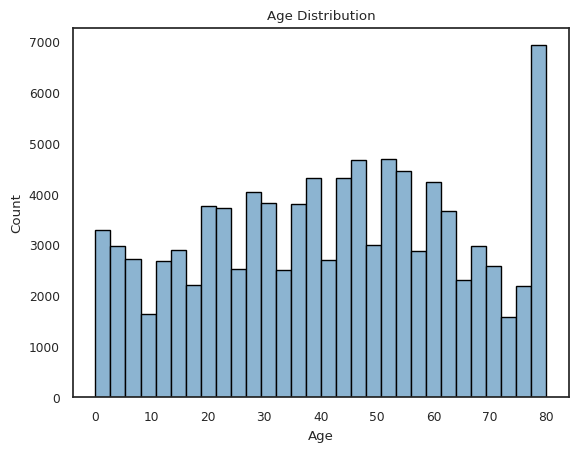

In [184]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

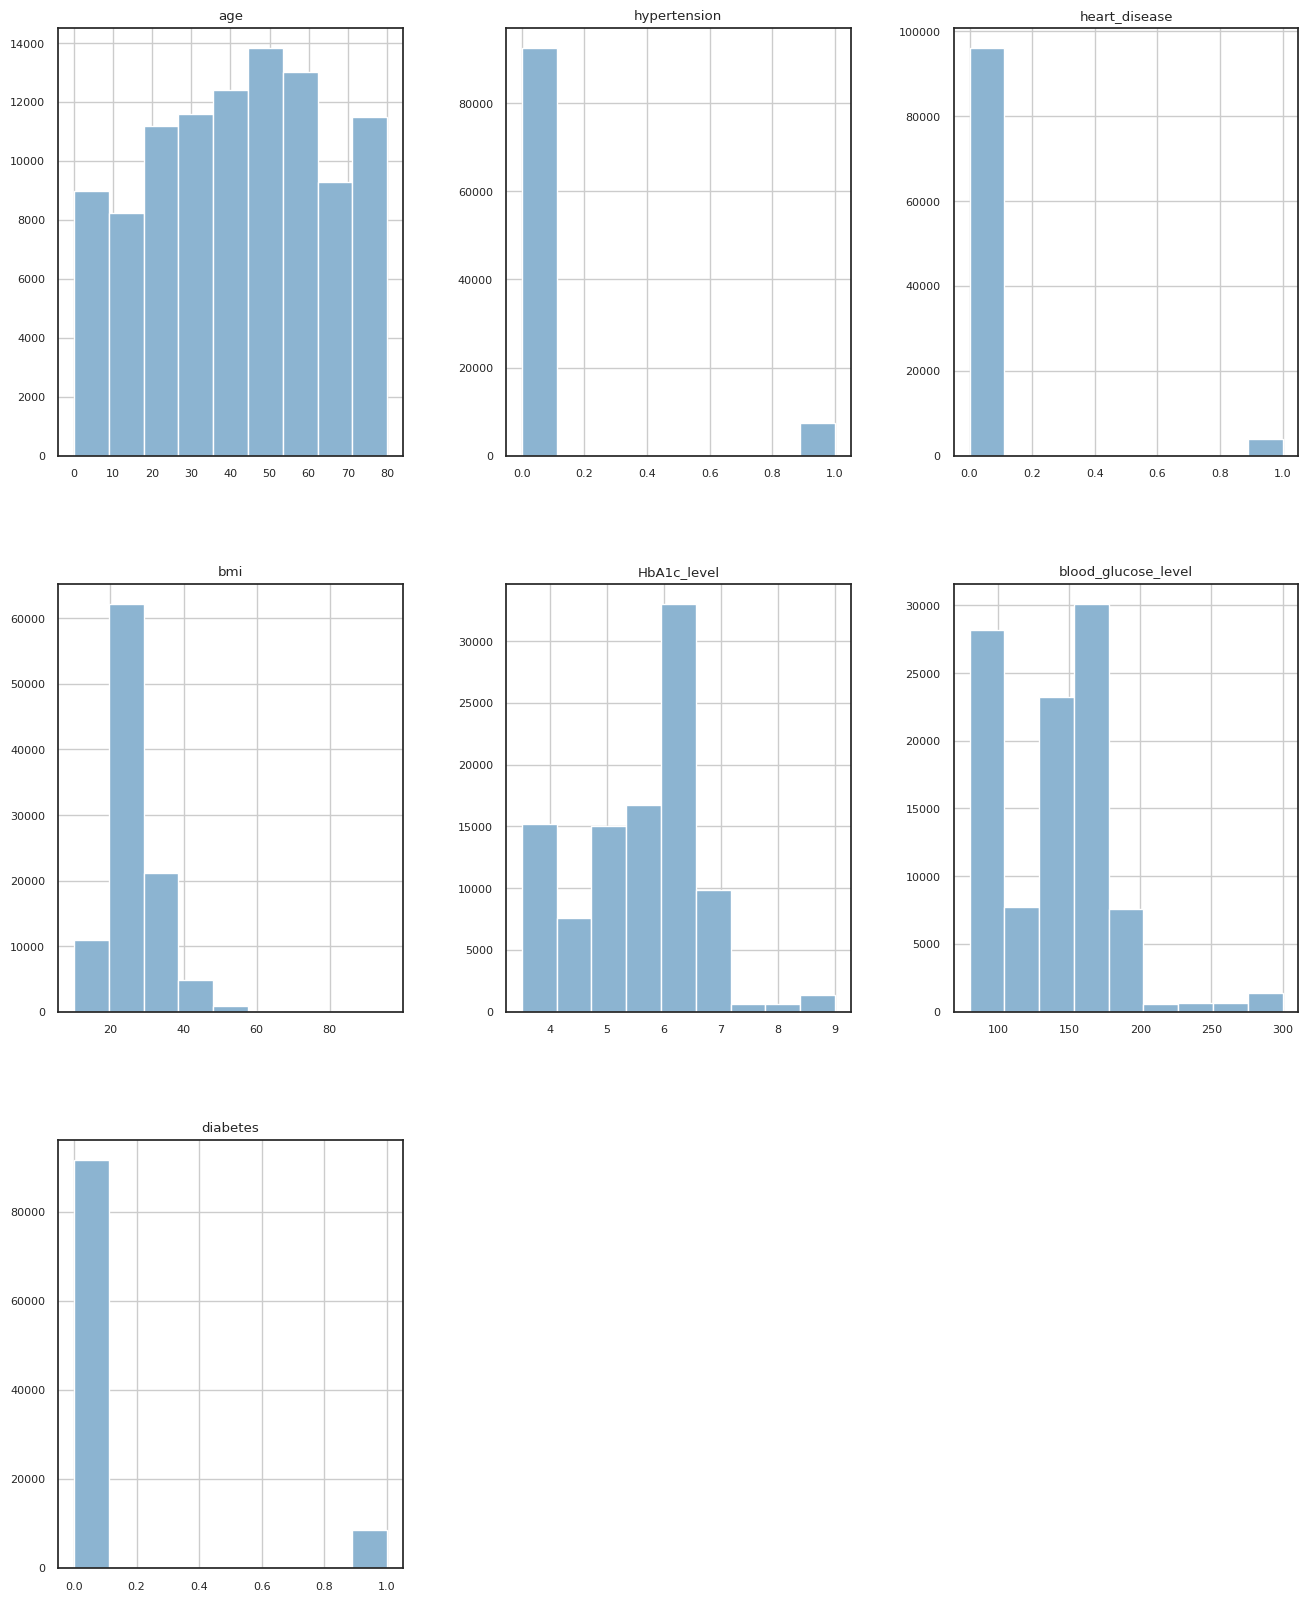

In [185]:
df.hist(figsize=(16, 20), bins=9, xlabelsize=8, ylabelsize=8);

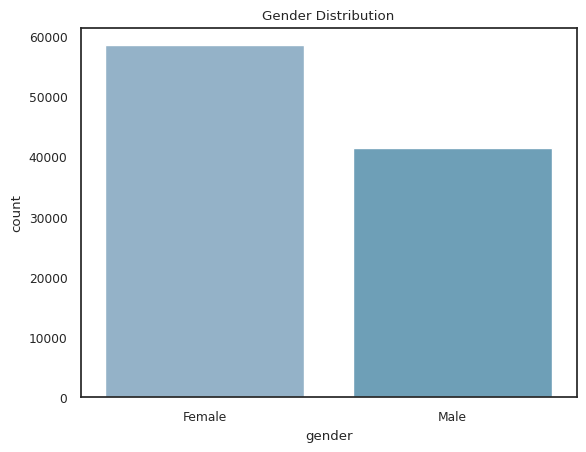

In [186]:
df = df[df['gender'] != 'Other']

sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

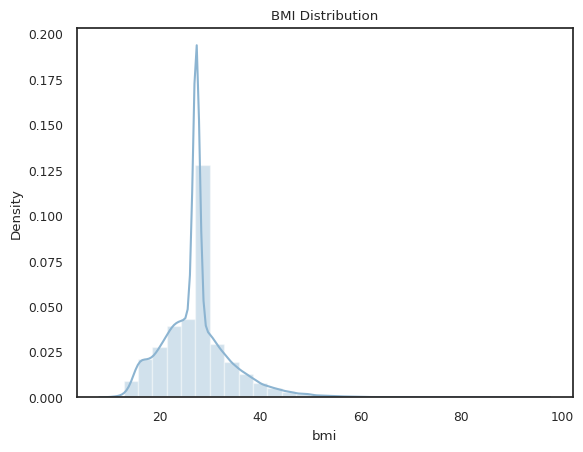

In [187]:
# Distribution plot for BMI


sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

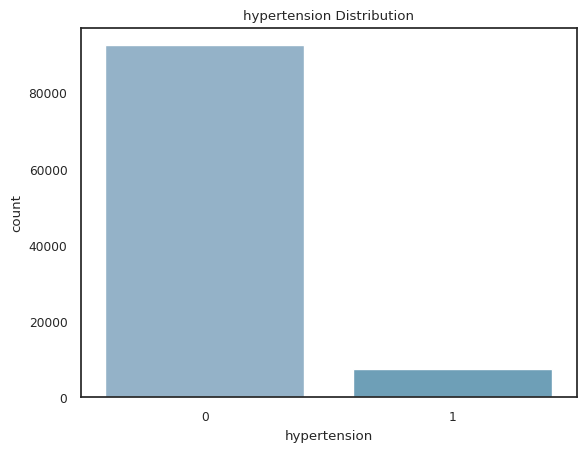

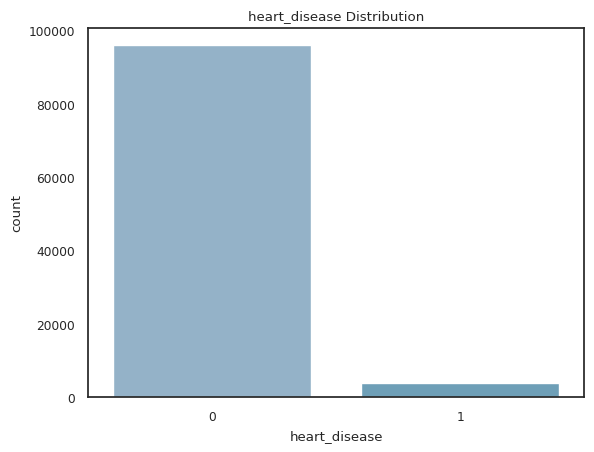

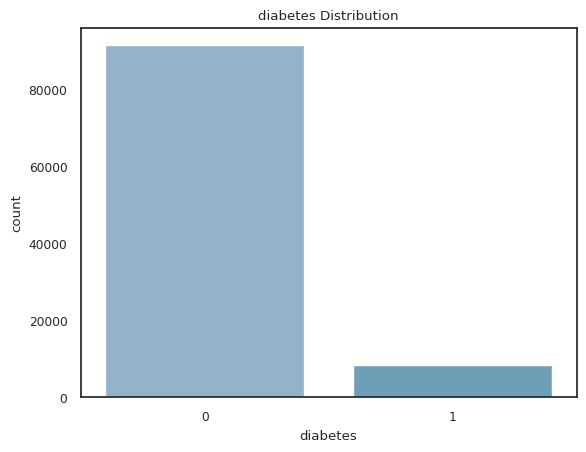

In [188]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

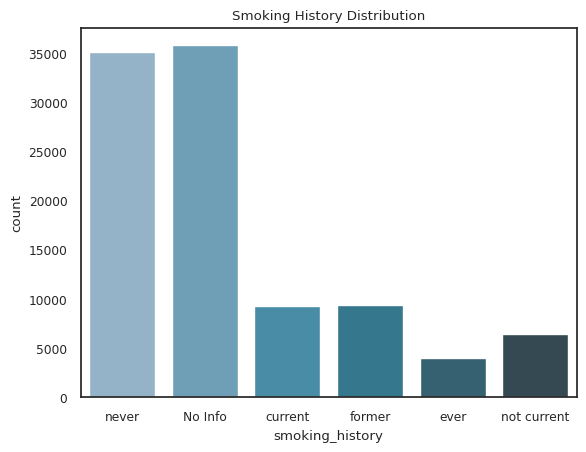

In [189]:
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

##Análisis Bivariado

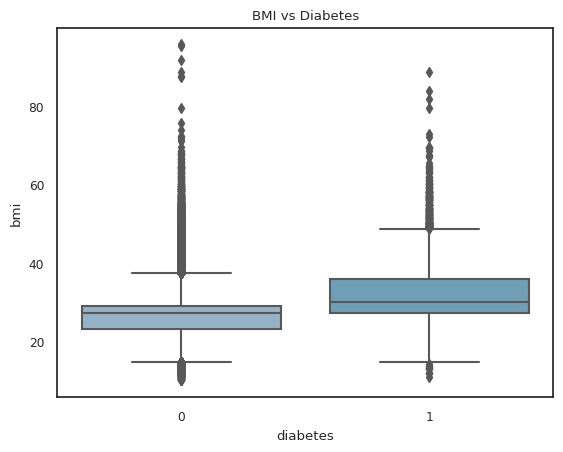

In [190]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

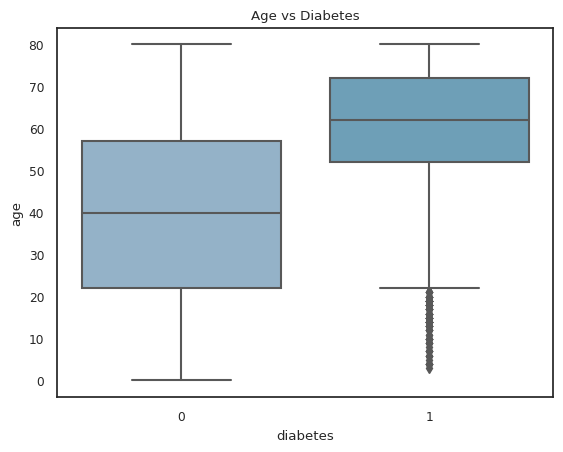

In [191]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

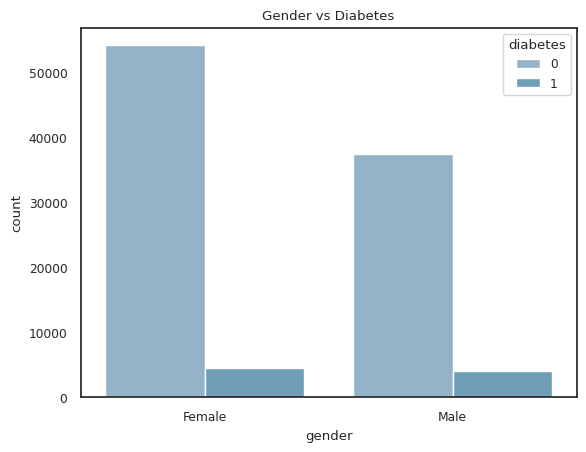

In [192]:
# Count plot of gender vs diabetes

df = df[df['gender'] != 'Other']

sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

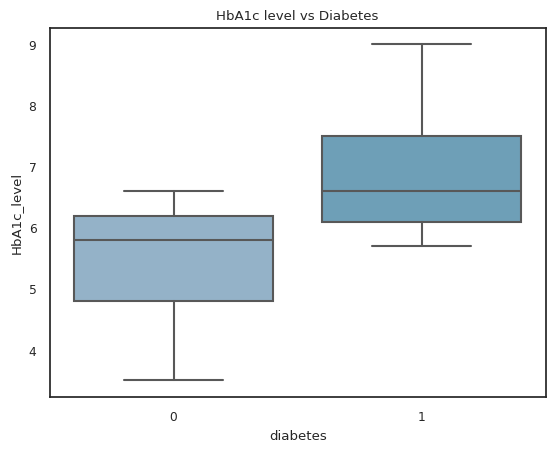

In [193]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

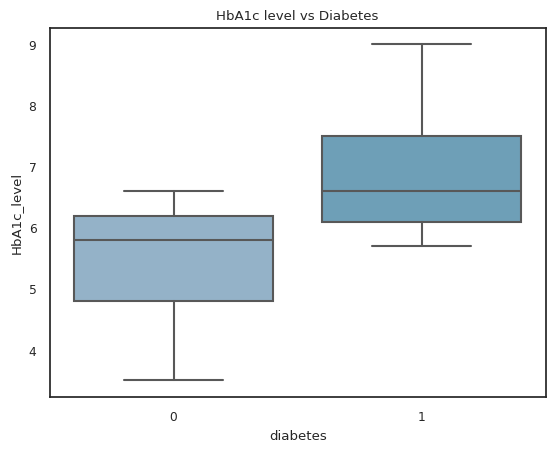

In [194]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

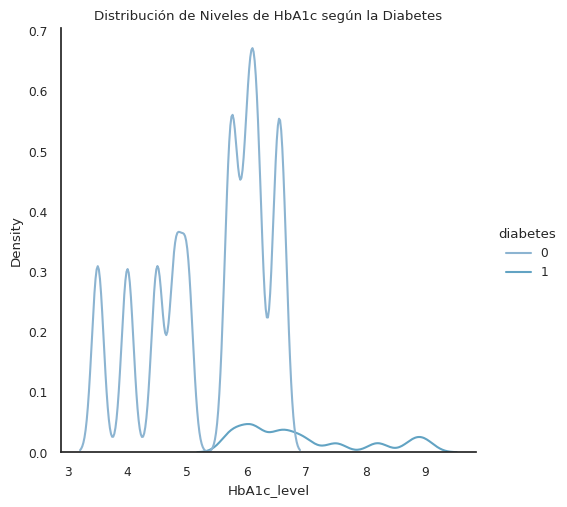

In [195]:
sns.displot(data=df, x="HbA1c_level", hue="diabetes", kind="kde", multiple="layer")
plt.title('Distribución de Niveles de HbA1c según la Diabetes')
plt.show()

En este gráfico de densidad podemos dar con un insight donde entendemos que a mayor Hemoglobina A1C, mayor es la chance de tener diabetes

##Análisis Multivariado

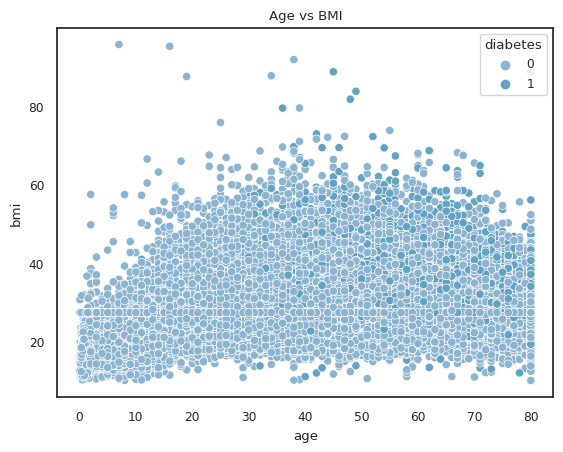

In [196]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

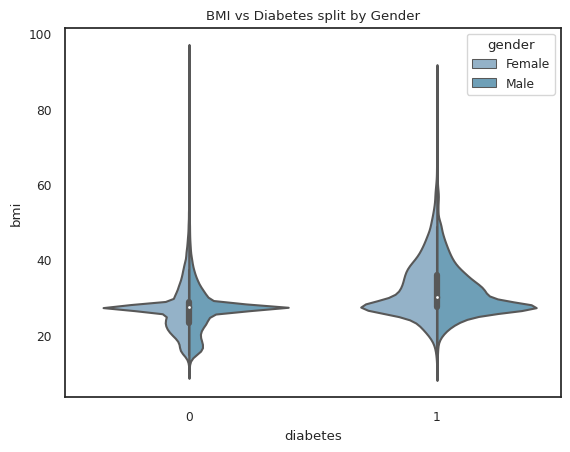

In [197]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

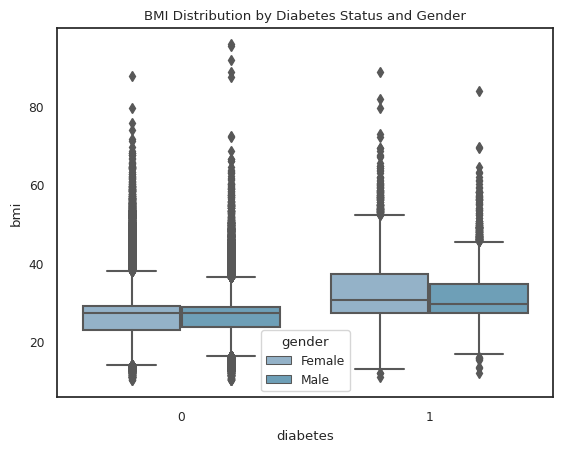

In [198]:
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

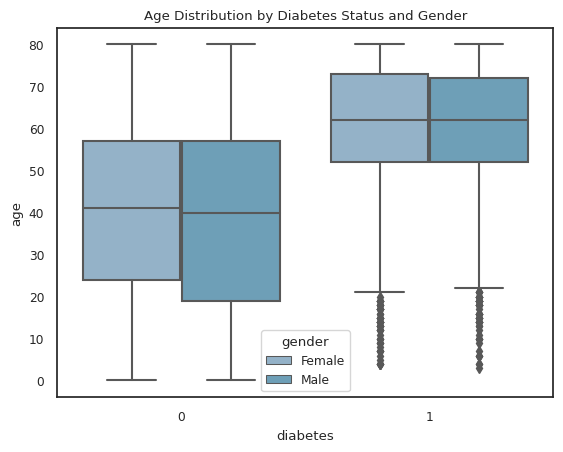

In [199]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

##Matriz de correlación:

In [200]:
#Preparamos los datos
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

non-smoker     70902
past_smoker    19794
current         9286
Name: smoking_history, dtype: int64


In [201]:
data = df.copy()

In [202]:
#Realizamos el encoding

one_hot_encoded_data = pd.get_dummies(df, columns = ["gender", "smoking_history"])
df = pd.DataFrame(one_hot_encoded_data)

In [203]:
df

age  hypertension  heart_disease   bmi  HbA1c_level  \
0     80.00             0              1 25.19         6.60   
1     54.00             0              0 27.32         6.60   
2     28.00             0              0 27.32         5.70   
3     36.00             0              0 23.45         5.00   
4     76.00             1              1 20.14         4.80   
...     ...           ...            ...   ...          ...   
99995 80.00             0              0 27.32         6.20   
99996  2.00             0              0 17.37         6.50   
99997 66.00             0              0 27.83         5.70   
99998 24.00             0              0 35.42         4.00   
99999 57.00             0              0 22.43         6.60   

       blood_glucose_level  diabetes  gender_Female  gender_Male  \
0                      140         0              1            0   
1                       80         0              1            0   
2                      158         0              0            1   
3                      155         0              1            0   
4                      155         0              0            1   
...                    ...       ...            ...          ...   
99995                   90         0              1            0   
99996                  100         0              1            0   
99997                  155         0              0            1   
99998                  100         0              1            0   
99999                   90         0              1            0   

       smoking_history_current  smoking_history_non-smoker  \
0                            0                           1   
1                            0                           1   
2                            0                           1   
3                            1                           0   
4                            1                           0   
...                        ...                         ...   
99995                        0                           1   
99996                        0                           1   
99997                        0                           0   
99998                        0                           1   
99999                        1                           0   

       smoking_history_past_smoker  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  
...                            ...  
99995                            0  
99996                            0  
99997                            1  
99998                            0  
99999                            0  

[99982 rows x 12 columns]

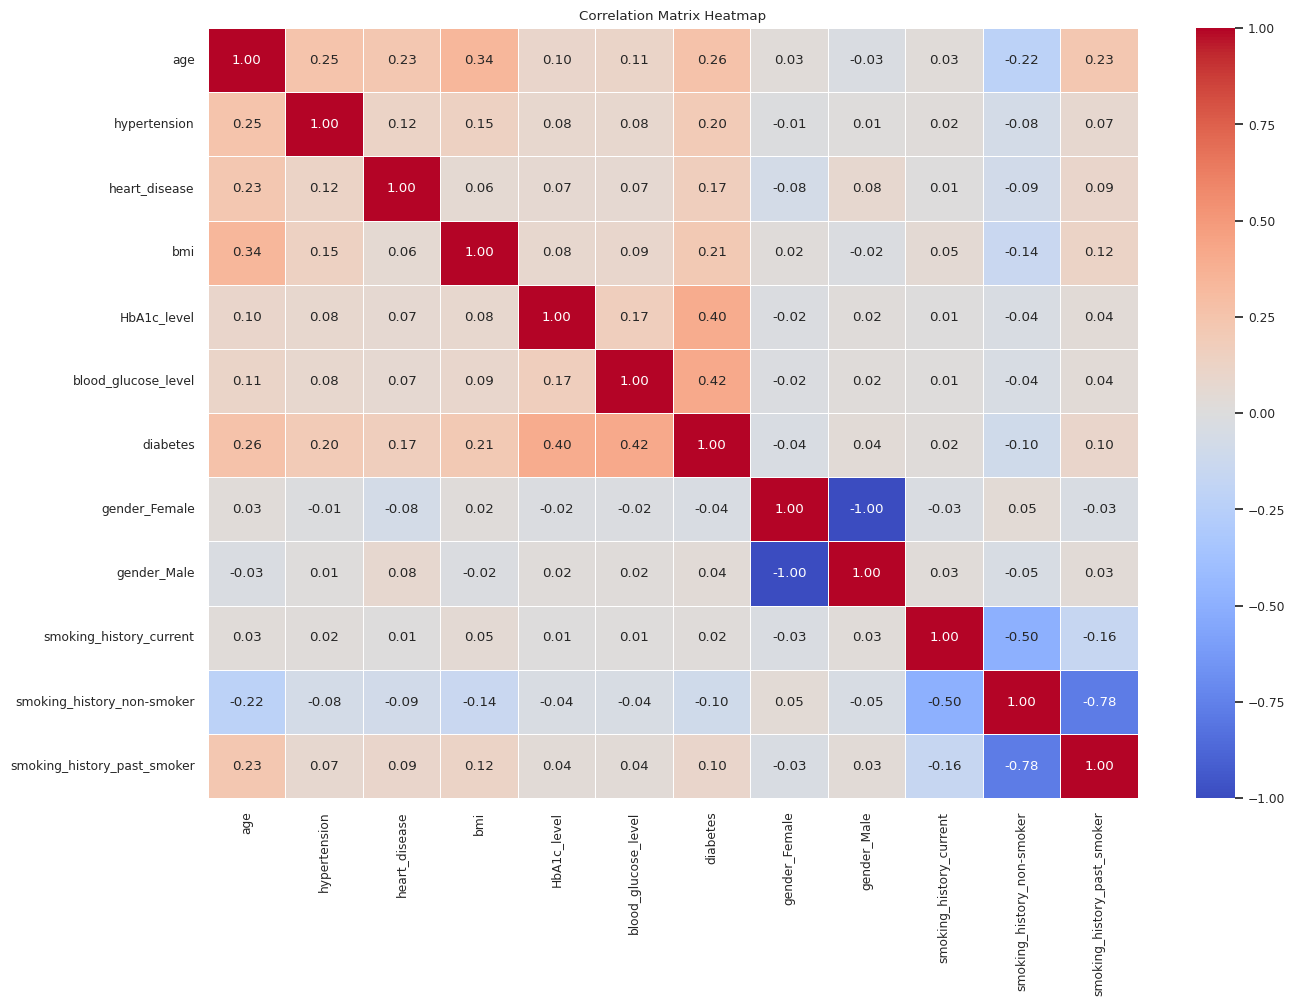

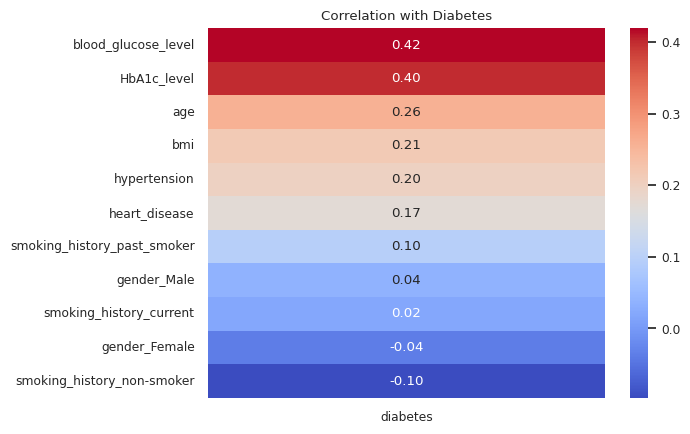

In [204]:
# Compute the correlation matrix
correlation_matrix = df.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

## Aplicamos spearman para ver nuestro coeficiente de correlación

In [205]:
#Aplicamos spearman (y quizás IQR para los outliers)

from scipy.stats import spearmanr


# Reemplaza 'variable1' y 'variable2' con los nombres de las variables que deseas comparar
HbA1c_level = df['HbA1c_level']
diabetes = df['diabetes']

# Calcula la correlación de Spearman
correlation, p_value = spearmanr(HbA1c_level, diabetes)

print(f"Coeficiente de Correlación de Spearman: {correlation}")
print(f"Valor p: {p_value}")

Coeficiente de Correlación de Spearman: 0.3287387849694274
Valor p: 0.0


In [206]:

# Reemplaza 'variable1' y 'variable2' con los nombres de las variables que deseas comparar
blood_glucose_level = df['blood_glucose_level']
diabetes = df['diabetes']

# Calcula la correlación de Spearman
correlation, p_value = spearmanr(blood_glucose_level, diabetes)

print(f"Coeficiente de Correlación de Spearman: {correlation}")
print(f"Valor p: {p_value}")

#Partiendo de que nuestro coeficiente no es próximo a -1 nin a 1, vemos que no existe una correlación lineal fuerte en ninguno de los casos

Coeficiente de Correlación de Spearman: 0.2742511344362934
Valor p: 0.0


---
#DATA WRANGLING 🧹
---

In [207]:
#Comenzamos la Limpieza de datos
#Vemos en esta celda que no tenemos valores nulos

df.isnull().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
gender_Female                  0
gender_Male                    0
smoking_history_current        0
smoking_history_non-smoker     0
smoking_history_past_smoker    0
dtype: int64

In [208]:
#Buscamos valores duplicados
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 99982, dtype: bool

In [209]:
#Eliminamos las filas duplicadas
df.drop_duplicates()

age  hypertension  heart_disease   bmi  HbA1c_level  \
0     80.00             0              1 25.19         6.60   
1     54.00             0              0 27.32         6.60   
2     28.00             0              0 27.32         5.70   
3     36.00             0              0 23.45         5.00   
4     76.00             1              1 20.14         4.80   
...     ...           ...            ...   ...          ...   
99994 36.00             0              0 24.60         4.80   
99996  2.00             0              0 17.37         6.50   
99997 66.00             0              0 27.83         5.70   
99998 24.00             0              0 35.42         4.00   
99999 57.00             0              0 22.43         6.60   

       blood_glucose_level  diabetes  gender_Female  gender_Male  \
0                      140         0              1            0   
1                       80         0              1            0   
2                      158         0              0            1   
3                      155         0              1            0   
4                      155         0              0            1   
...                    ...       ...            ...          ...   
99994                  145         0              1            0   
99996                  100         0              1            0   
99997                  155         0              0            1   
99998                  100         0              1            0   
99999                   90         0              1            0   

       smoking_history_current  smoking_history_non-smoker  \
0                            0                           1   
1                            0                           1   
2                            0                           1   
3                            1                           0   
4                            1                           0   
...                        ...                         ...   
99994                        0                           1   
99996                        0                           1   
99997                        0                           0   
99998                        0                           1   
99999                        1                           0   

       smoking_history_past_smoker  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  
...                            ...  
99994                            0  
99996                            0  
99997                            1  
99998                            0  
99999                            0  

[93971 rows x 12 columns]

##Preprocesamiento de datos: Desbalance de clase

A partir del Análisis Exploratorio de Datos (EDA), el conjunto de datos está desequilibrado (con un 8.5% de casos positivos para la diabetes y un 91.5% de casos negativos). Es esencial equilibrar los datos para asegurarse de que el modelo no se sesgue hacia la clase mayoritaria. Con este propósito, se utiliza la Técnica de Sobremuestreo Sintético de la Clase Minoritaria (SMOTE), que genera muestras sintéticas para la clase minoritaria.

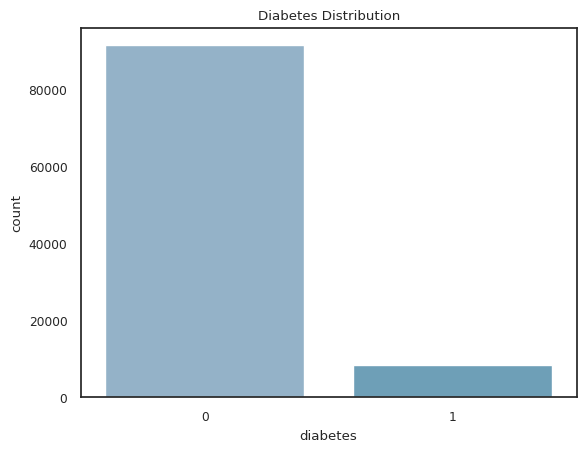

In [210]:
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

In [211]:
import plotly.express as px

def shareplot(df,target):
    dfi = df.groupby(target).size().reset_index(name="Count")
    fig = px.pie(dfi, values='Count', names=target)
    fig.update_traces(textposition='auto', textinfo='percent+label',sort=False,showlegend=False,rotation=90)
    fig.update_layout(title_text='Class label shares',title_x=0.5)
    fig.show()

shareplot(df,"diabetes")

In [212]:

#Aquí intento crear una matriz para ver mi desbalance, al principio funcionó bien, pero algo toqué y ahora me figuran solo mil datos, y balanceados


values_counts_originales = np.asarray(np.unique(y, return_counts=True))
values_counts_originales

array([[    0,     1],
       [91482,  8500]])

In [213]:
# Aplicamos SMOTE
smote = SMOTE(k_neighbors=5,random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)




In [214]:
#Comprobemos que las clases estan balabceadas
# Aquí debería tener miles de datos en iguales cantidades de ambos lados, de nuevo, al principio funcionó, pero algo toqué y ya no

values_counts_SMOTE = np.asarray(np.unique(y_train_smote, return_counts=True))
values_counts_SMOTE

array([[    0,     1],
       [73260, 73260]])

##Preprocesamiento de datos: Estandarización

La preprocesamiento es un paso crucial antes de entrenar el modelo. En este caso, las características numéricas se estandarizan (se les quita la media y se escalan a varianza unitaria), y las características categóricas se codifican mediante one-hot encoding. La estandarización no es necesaria para todos los modelos, pero generalmente es una buena práctica. El one-hot encoding es necesario para que las variables categóricas sean comprendidas correctamente por el modelo de aprendizaje automático.

El StandardScaler en sklearn se basa en la suposición de que los datos, Y, siguen una distribución que no necesariamente es Gaussiana (normal), pero aún así los transformamos de tal manera que su distribución tendrá un valor medio de 0 y una desviación estándar de 1.

En otras palabras, dado un vector de características x, modifica los valores de la siguiente manera:

Yi = (xi - μ(x⃗)) / σ(x⃗)

donde:

xi es el i-ésimo elemento del vector de características original x⃗.
μ(x⃗) es la media del vector de características.
σ(x⃗) es la desviación estándar del vector de características.
Los datos transformados Y (cada Yi) tendrán propiedades tales que la media(Y) = 0 y std(Y) = 1.

Esta transformación también se conoce como normalización de puntuación Z.

In [215]:
#Estandarizamos
ss = StandardScaler()

In [216]:
df[X_cols] = ss.fit_transform(df[X_cols])

In [217]:
df.head()

age  hypertension  heart_disease   bmi  HbA1c_level  blood_glucose_level  \
0  1.69         -0.28           4.94 -0.32         1.00                 0.05   
1  0.54         -0.28          -0.20 -0.00         1.00                -1.43   
2 -0.62         -0.28          -0.20 -0.00         0.16                 0.49   
3 -0.26         -0.28          -0.20 -0.58        -0.49                 0.42   
4  1.51          3.52           4.94 -1.08        -0.68                 0.42   

   diabetes  gender_Female  gender_Male  smoking_history_current  \
0         0              1            0                        0   
1         0              1            0                        0   
2         0              0            1                        0   
3         0              1            0                        1   
4         0              0            1                        1   

   smoking_history_non-smoker  smoking_history_past_smoker  
0                           1                            0  
1                           1                            0  
2                           1                            0  
3                           0                            0  
4                           0                            0

---
# SELECCIÓN DE ALGORITMO 🧪
---
###Elegimos la regresión logísitica como primer algoritmo

In [218]:
#Algo estoy haciendo mal aquí, pues mis métricas me dan niveles absurdamente altos



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)






# Entrenar un clasificador en los datos con SMOTE
classifier = LogisticRegression(class_weight="balanced")
modelo_datos_SMOTE = classifier.fit(X_train_smote, y_train_smote)

# Realizar predicciones en el conjunto de prueba
y_pred_SMOTE = modelo_datos_SMOTE.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred_SMOTE))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91     27445
           1       0.32      0.79      0.46      2550

    accuracy                           0.84     29995
   macro avg       0.65      0.82      0.68     29995
weighted avg       0.92      0.84      0.87     29995



In [219]:
#Generamos una evaluación de modelos apropiados para el problema de interés
#Como es un problema de clasificación, usaremos accuracy, precision, recall, y f1 score

from sklearn.metrics import classification_report
from sklearn import metrics


accuracy = accuracy_score(y_test, y_pred_SMOTE)
precision = precision_score(y_test, y_pred_SMOTE)
recall = recall_score(y_test, y_pred_SMOTE)
f1score = f1_score(y_test, y_pred_SMOTE)


print(precision)
print(recall)
print(f1score)
print(accuracy)



print(classification_report(y_test, y_pred_SMOTE))






# F1 score bajo puede signifcar overfitting
#Por alguna razón estoy trabajando con 300 datos, consultar por qué

0.32246261533566656
0.7949019607843137
0.458804889090086
0.8405734289048175
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     27445
           1       0.32      0.79      0.46      2550

    accuracy                           0.84     29995
   macro avg       0.65      0.82      0.68     29995
weighted avg       0.92      0.84      0.87     29995



Identificamos en la celda anterior que nuestro accuracy es notablemente alto, por lo cual podemos descartar un caso de **underfitting**.
A continuación, realizamos la matriz de confusión.

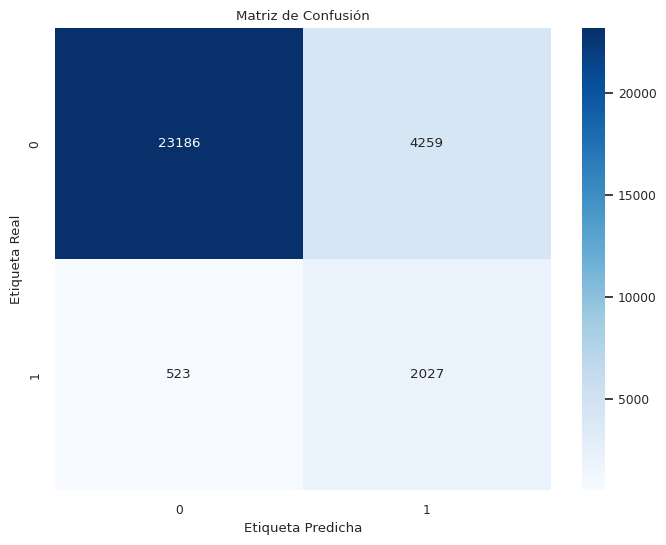

In [220]:
conf_matrix = confusion_matrix(y_test, y_pred_SMOTE)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()

#De nuevo, aquí vemos que solo hay 300 datos, cuando deberían ser miles (el subconjunto de testeo completo)


Como se trata de un problema de diabetes, tenemos es más grave predecir un falso negativo que un falso positivo, por lo tanto buscaremos una métrica que esté orientada a minimizar los falsos negativos, esta es **Recall** también conocida como Tasa de Verdaderos Positivos o Sensibilidad.

A partir de aquí, intentaremos maximizar el Recall:
(Recall=Verdaderos Positivos/ (Verdaderos Positivos + Falsos Negativos))

Aunque estamos priorizando la reducción de falsos negativos, no debemos ignorar completamente los falsos positivos. Por lo tanto, también podríamos considerar utilizar una métrica secundaria, como la Precisión. La precisión mide la proporción de casos verdaderamente positivos entre todas las predicciones positivas realizadas por el modelo.





In [221]:
#Observamos que nuestro recall es bastante bajo, por lo tanto podríamos ajustar hiperparámetros,
#probar diferentes algoritmos de clasificación y realizar una validación cruzada para una evaluación
#más robusta del rendimiento del modelo. También podría ser útil
#considerar técnicas de preprocesamiento, como la normalización de características y el manejo
#de desequilibrios de clases si es necesario.

print("Sensibilidad (Recall):", recall)

Sensibilidad (Recall): 0.7949019607843137


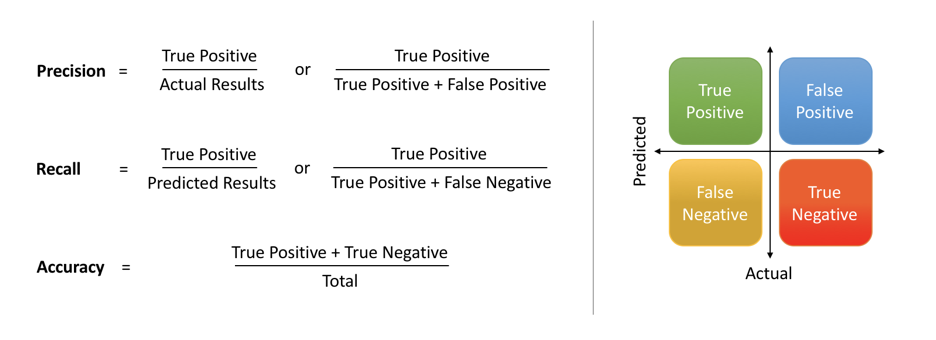

## Random Forest
"Se construye un canal que primero aplica los pasos de preprocesamiento y luego entrena un modelo con los datos. Utilizamos un RandomForestClassifier, que es un algoritmo popular y potente para tareas de clasificación. Los hiperparámetros del modelo se ajustan utilizando GridSearchCV, que realiza una búsqueda exhaustiva sobre los valores de parámetros especificados para el estimador. El modelo de mejor rendimiento se selecciona en función de la validación cruzada."


In [222]:
from sklearn.ensemble import RandomForestClassifier


# Supongamos que tienes un conjunto de datos de características (X) y etiquetas de destino (y)
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrena el modelo en los datos de entrenamiento
rf_classifier.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred = rf_classifier.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo Random Forest: {accuracy}')


print("Model Accuracy: ", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))



Precisión del modelo Random Forest: 0.9708456268440266
Model Accuracy:  0.9708456268440266
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       1.00      0.67      0.80      1775

    accuracy                           0.97     19997
   macro avg       0.98      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997



In [223]:
from sklearn.tree import plot_tree

# Supongamos que ya has entrenado un modelo Random Forest llamado rf_classifier

# Establece el índice del árbol que deseas visualizar (0 para el primer árbol, 1 para el segundo, y así sucesivamente)
tree_index = 0

# Obtén el árbol específico del modelo Random Forest
tree = rf_classifier.estimators_[tree_index]

# Visualiza el árbol
plt.figure(figsize=(200, 100))  # Ajusta el tamaño de la figura según tus preferencias
plot_tree(tree, filled=True)
plt.show()

---
#CONCLUSIONES 🌈
---

## Insights
Basándonos en los resultados obtenidos en este estudio, se pueden extraer algunos insights importantes: Nuestros hallazgos respaldan la hipótesis de que existen asociaciones significativas entre la diabetes y los niveles de HbA1c y glucosa en sangre. Los individuos con niveles más altos de HbA1c y glucosa en sangre tienen una mayor probabilidad de ser diagnosticados con diabetes. Estos resultados refuerzan la importancia de controlar y mantener niveles óptimos de HbA1c y glucosa en sangre para prevenir y gestionar la diabetes.

Nuestra investigación también respalda la hipótesis de que el historial de tabaquismo está relacionado con un mayor riesgo de diabetes. Específicamente, los individuos con antecedentes de tabaquismo actual o anterior tienen una mayor probabilidad de desarrollar diabetes en comparación con aquellos que nunca han fumado o que no son fumadores en la actualidad. Estos hallazgos subrayan la necesidad de abordar el tabaquismo como un factor de riesgo importante en la prevención y el manejo de la diabetes.


##Conclusión:

En conclusión, este estudio subraya la relación entre altos niveles de HbA1c y glucosa en sangre y el riesgo de diabetes. También confirma que el historial de tabaquismo aumenta la probabilidad de desarrollar diabetes. Estos hallazgos resaltan la importancia de mantener niveles óptimos de glucosa y HbA1c, así como de abordar el tabaquismo en la prevención y el manejo de la diabetes.





##Recomendaciones

**Recopilación de datos**: Si es posible realizar una recopilación adicional de datos, podríamos buscar obtener más información sobre factores de estilo de vida y otros posibles factores de riesgo de diabetes no incluidos en este conjunto de datos. Por ejemplo, información detallada sobre la dieta, nivel de actividad física, antecedentes familiares de diabetes y datos más precisos sobre enfermedades cardíacas o hipertensión podrían mejorar las capacidades predictivas del modelo.

**Exploración del modelo**: Aunque el modelo de Bosque Aleatorio ha tenido un buen rendimiento, podría valer la pena explorar otros modelos de aprendizaje automático. Por ejemplo, modelos de aumento de gradiente como XGBoost o LightGBM podrían ofrecer un rendimiento mejorado.

**Ingeniería de características**: Una ingeniería de características más sofisticada podría mejorar potencialmente el rendimiento del modelo. Las características de interacción, características polinómicas u otras transformaciones podrían valer la pena explorar.

**Interpretación del modelo**: Para comprender mejor la influencia de cada característica, podríamos utilizar herramientas de interpretación como SHAP (SHapley Additive exPlanations) o la importancia de características por permutación, que pueden ofrecer una vista más matizada de la importancia de las características que las tradicionales basadas en la reducción de impureza.

**Abordar el desequilibrio de clases**: A pesar de utilizar SMOTE para equilibrar las clases, todavía hay margen para mejorar las métricas de rendimiento para la clase minoritaria. Se podrían explorar otros métodos de sobremuestreo, métodos de submuestreo o métodos de aprendizaje sensibles al costo para mejorar la recall y la precisión para la clase minoritaria.